# we will analyze the daily changed for VIX,VXXBEN,UVXY,SPY, and first to 4th month futures

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
vixx_Data = pd.read_csv("vixDataUpdated", index_col="Date")

In [47]:
vixx_Data.index = pd.DatetimeIndex(vixx_Data.index)

In [48]:
vixx_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 22 columns):
UVXY                  3246 non-null float64
SPY                   3246 non-null float64
VXXBEN                3246 non-null float64
VIX                   3246 non-null float64
UX1                   3246 non-null float64
UX2                   3246 non-null float64
UX3                   3246 non-null float64
UX4                   3246 non-null float64
Day OF Week           3246 non-null int64
Rolling Days          3246 non-null int64
UVXY Daily Changes    3245 non-null float64
VIX Daily Changes     3245 non-null float64
VXXBEN daily          3245 non-null float64
SPY Daily Changes     3245 non-null float64
UX1_daily changes     3245 non-null float64
UX2_daily changes     3245 non-null float64
UX3_daily changes     3245 non-null float64
UX4_daily changes     3245 non-null float64
UVXY_MA_30            3217 non-null float64
UVXY_MA_60            3187 non-null float64

## we will calculate the simple moving ,and Exponential Weighted Moving average (30, 60 days) of UVXY  along with its changes over the period 

In [49]:
vixx_Data["UVXY_MA_30"] = vixx_Data.rolling(30)["UVXY"].mean()

In [50]:
vixx_Data["UVXY_MA_60"] = vixx_Data.rolling(60)["UVXY"].mean()

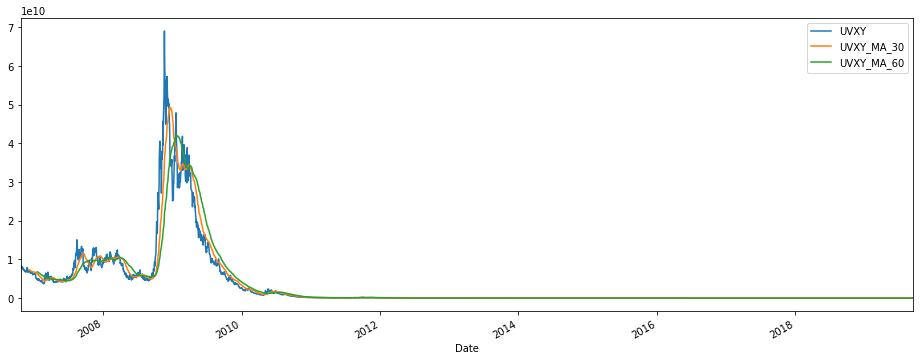

In [51]:
vixx_Data[["UVXY", "UVXY_MA_30", "UVXY_MA_60"]].plot(figsize = (16,6))

# EWMA

In [52]:
vixx_Data["UVXY-EWMA-30"] = vixx_Data["UVXY"].ewm(span=30).mean()

In [53]:
vixx_Data["UVXY-EWMA-60"] = vixx_Data["UVXY"].ewm(span=60).mean()

In [54]:
vixx_Data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3246 entries, 2006-10-23 to 2019-09-16
Data columns (total 22 columns):
UVXY                  3246 non-null float64
SPY                   3246 non-null float64
VXXBEN                3246 non-null float64
VIX                   3246 non-null float64
UX1                   3246 non-null float64
UX2                   3246 non-null float64
UX3                   3246 non-null float64
UX4                   3246 non-null float64
Day OF Week           3246 non-null int64
Rolling Days          3246 non-null int64
UVXY Daily Changes    3245 non-null float64
VIX Daily Changes     3245 non-null float64
VXXBEN daily          3245 non-null float64
SPY Daily Changes     3245 non-null float64
UX1_daily changes     3245 non-null float64
UX2_daily changes     3245 non-null float64
UX3_daily changes     3245 non-null float64
UX4_daily changes     3245 non-null float64
UVXY_MA_30            3217 non-null float64
UVXY_MA_60            3187 non-null float64

# ETS Model (Error, Trend,Seasonal)

In [57]:
Ets_result = seasonal_decompose(vixx_Data["UVXY"], model="multiplicative", freq=12)

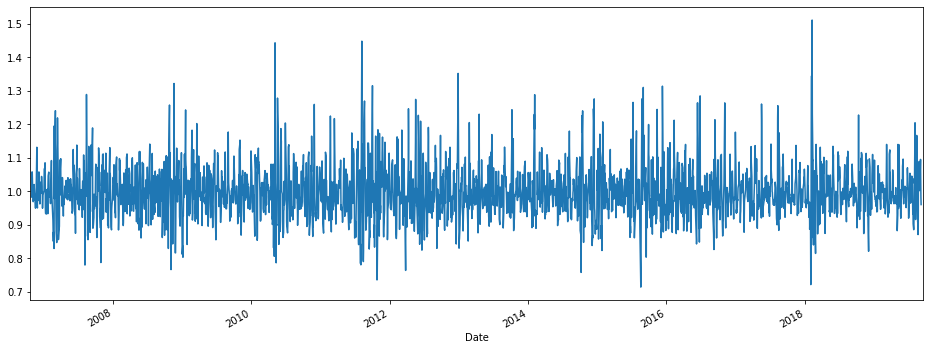

In [63]:
Ets_result.resid.plot(figsize = (16,6))